In [54]:
# Cell 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from ipywidgets import FloatSlider, interact

In [73]:
# Cell 2

# Cognitive decline in Alzheimer's based on time and age
def alzheimers_progression(time, age): # Hypothetical, adjust based on research.
    
    decline_rate = 2  # % decline per year; adjust based on research.
    return np.maximum(100 - (age + decline_rate * time), 0)

def stem_cell_effect(time, dose): # Hypothetical effect of stem cell therapy over time, adjust based on research
    
    return dose * np.cos(time)  # Placeholder; adjust according to research.

# Calculate cognitive function over time with and without therapy.
def cognitive_function(time, age, dose_low, dose_high): 
    
    cognitive_without = alzheimers_progression(time, age)
    cognitive_with_low = cognitive_without + stem_cell_effect(time, dose_low)
    cognitive_with_high = cognitive_without + stem_cell_effect(time, dose_high)
    return cognitive_without, cognitive_with_low, cognitive_with_high


In [74]:
# Cell 3
patients = [
    {"name": "Patient A", "age": 65, "genetic_risk": "high", "stage": "mild", "therapy": "low_dose"},
    {"name": "Patient B", "age": 70, "genetic_risk": "medium", "stage": "moderate", "therapy": "high_dose"},
    {"name": "Patient C", "age": 80, "genetic_risk": "low", "stage": "severe", "therapy": "none"},
    {"name": "Patient D", "age": 75, "genetic_risk": "high", "stage": "moderate", "therapy": "low_dose"},
    {"name": "Patient E", "age": 68, "genetic_risk": "medium", "stage": "mild", "therapy": "high_dose"}
]

# Parameters for genetic risk and therapy impact
genetic_risk_factor = {"low": 1.0, "medium": 1.2, "high": 1.5}
therapy_effect = {"none": 1.0, "low_dose": 0.9, "high_dose": 0.75}

# Regions affected by Alzheimer's
regions = ["Memory", "Language", "Executive Function", "Spatial Awareness"]

# Cognitive health score: baseline and decline rates
base_cognitive_health = {"mild": 70, "moderate": 50, "severe": 30}
decline_rate = {"Memory": 0.05, "Language": 0.04, "Executive Function": 0.06, "Spatial Awareness": 0.03}


In [75]:
# Cell 4
cognitive_health = {}

for patient in patients:
    cognitive_health[patient["name"]] = {
        'Memory': calculate_cognitive_health(patient),
        'Language': calculate_cognitive_health(patient),
        'Executive Function': calculate_cognitive_health(patient),
        'Spatial Awareness': calculate_cognitive_health(patient),
    }

# Convert cognitive health
data_df = pd.DataFrame(list(cognitive_health.items()), columns=['Patient', 'Cognitive Health'])
print(data_df)



     Patient                                   Cognitive Health
0  Patient A  {'Memory': 94.5, 'Language': 94.5, 'Executive ...
1  Patient B  {'Memory': 45.0, 'Language': 45.0, 'Executive ...
2  Patient C  {'Memory': 30.0, 'Language': 30.0, 'Executive ...
3  Patient D  {'Memory': 67.5, 'Language': 67.5, 'Executive ...
4  Patient E  {'Memory': 63.0, 'Language': 63.0, 'Executive ...


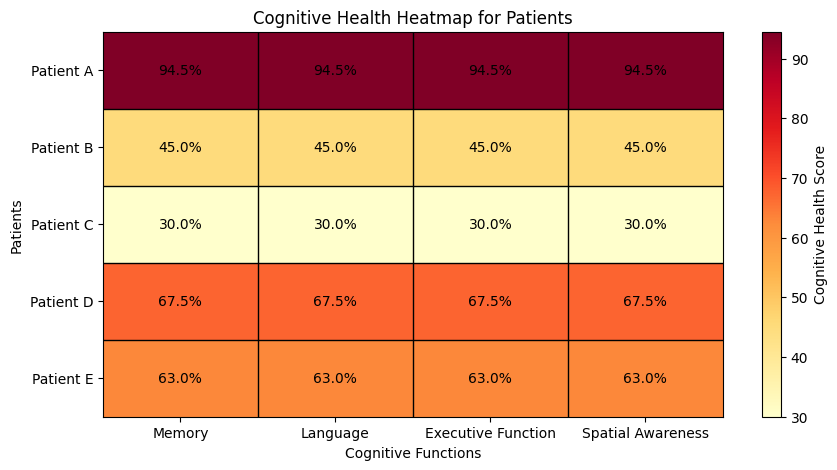

In [85]:
# Cell 5
heatmap_data = []
patient_names = []

# Prepare data and names
for patient, scores in cognitive_health.items():
    patient_names.append(patient)
    heatmap_data.append(list(scores.values()))

heatmap_data = np.array(heatmap_data, dtype=float)

# Create heatmap
plt.figure(figsize=(10, 5))
heatmap = plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')  # No grid lines here

# Add color bar
plt.colorbar(heatmap, label='Cognitive Health Score')

# Ticks and labels
plt.xticks(ticks=np.arange(len(scores)), labels=scores.keys())  # Cognitive Functions
plt.yticks(ticks=np.arange(len(patient_names)), labels=patient_names)  # Patients

# Title and labels
plt.title('Cognitive Health Heatmap for Patients')
plt.xlabel('Cognitive Functions')
plt.ylabel('Patients')

# Cell with the numeric value
for i in range(len(patient_names)):
    for j in range(len(scores)):
        plt.text(j, i, f'{heatmap_data[i, j]:.1f}%', ha='center', va='center', color='black')

# Black grid lines for columns and rows
for i in range(1, len(patient_names)):
    plt.axhline(i - 0.5, color='black', linewidth=1)  # Horizontal lines for rows
for j in range(1, len(scores)):
    plt.axvline(j - 0.5, color='black', linewidth=1)  # Vertical lines for columns

plt.show()




In [86]:
# Cell 6
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, interact

# Time in years
time = np.linspace(0, 10, 100)  # Time period for cognitive function analysis (years)

# Default values
age = 65  # Starting age
dose_low = 1  # Low stem cell dose, hypothetical
dose_high = 3  # High stem cell dose, hypothetical

# Cognitive function calculations
def update_plot(age, dose_low, dose_high):
    cognitive_without = alzheimers_progression(time, age)  # Without treatment
    cognitive_with_low = cognitive_without + stem_cell_effect(time, dose_low)  # With low dose therapy
    cognitive_with_high = cognitive_without + stem_cell_effect(time, dose_high)  # With high dose therapy
    
    plt.figure(figsize=(10, 6))
    
    # Plot
    plt.plot(time, cognitive_without, label='Without Therapy', color='red', linestyle='--')
    plt.plot(time, cognitive_with_low, label='Low Dose Therapy', color='blue')
    plt.plot(time, cognitive_with_high, label='High Dose Therapy', color='green')
    
    plt.ylim(0, 50)
    
    # Labeling
    plt.xlabel('Time (years)')
    plt.ylabel('Cognitive Function (%)')
    plt.title('Cognitive Decline with and without Stem Cell Therapy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sliders
age_slider = FloatSlider(min=50, max=75, step=1, value=age, description='Age')
dose_low_slider = FloatSlider(min=0, max=5, step=0.1, value=dose_low, description='Low Dose')
dose_high_slider = FloatSlider(min=0, max=5, step=0.1, value=dose_high, description='High Dose')

# Interactive function
interact(update_plot, age=age_slider, dose_low=dose_low_slider, dose_high=dose_high_slider);


interactive(children=(FloatSlider(value=65.0, description='Age', max=75.0, min=50.0, step=1.0), FloatSlider(va…